#Quais fatores influenciam na valorização ou desvalorização de um ativo?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.patches as mpatches

In [2]:
df = pd.read_csv('/content/all_stocks_5yr.csv')
df.head()

,date,open,high,low,close,volume,Name
0,2013-02-08,15.07,15.12,14.63,14.75,8407500,AAL
1,2013-02-11,14.89,15.01,14.26,14.46,8882000,AAL
2,2013-02-12,14.45,14.51,14.10,14.27,8126000,AAL
3,2013-02-13,14.30,14.94,14.25,14.66,10259500,AAL
4,2013-02-14,14.94,14.96,13.16,13.99,31879900,AAL


In [3]:
#Vendo a quantidade de linhas e colunas tem o dataframe
df.shape

(619040, 7)

In [4]:
#Vendo a quantidade de elementos do dataframe
df.size

4333280

In [5]:
#Vendo a dimensão do dataframe
df.ndim

2

In [7]:
#Verificando o tipo dos dados
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 619040 entries, 0 to 619039
Data columns (total 7 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   date    619040 non-null  object 
 1   open    619029 non-null  float64
 2   high    619032 non-null  float64
 3   low     619032 non-null  float64
 4   close   619040 non-null  float64
 5   volume  619040 non-null  int64  
 6   Name    619040 non-null  object 
dtypes: float64(4), int64(1), object(2)
memory usage: 33.1+ MB


##Tratando dados faltantes

In [8]:
#Verificando os dados faltantes do dataset
df.isnull().sum()

,0
date,0
open,11
high,8
low,8
close,0
volume,0
Name,0


In [9]:
#tratando os dados faltantes com a média dos preços anteriores e seguintes
df['open'] = df['open'].interpolate(method='linear')
df['high'] = df['high'].interpolate(method='linear')
df['low'] = df['low'].interpolate(method='linear')

In [10]:
df.isnull().sum()

,0
date,0
open,0
high,0
low,0
close,0
volume,0
Name,0


##Criando features

In [11]:
#Criando a coluna de ano
df['year'] = pd.DatetimeIndex(df['date']).year
df

,date,open,high,low,close,volume,Name,year
0,2013-02-08,15.07,15.12,14.63,14.75,8407500,AAL,2013
1,2013-02-11,14.89,15.01,14.26,14.46,8882000,AAL,2013
2,2013-02-12,14.45,14.51,14.10,14.27,8126000,AAL,2013
3,2013-02-13,14.30,14.94,14.25,14.66,10259500,AAL,2013
4,2013-02-14,14.94,14.96,13.16,13.99,31879900,AAL,2013
...,...,...,...,...,...,...,...,...
619035,2018-02-01,76.84,78.27,76.69,77.82,2982259,ZTS,2018
619036,2018-02-02,77.53,78.12,76.73,76.78,2595187,ZTS,2018
619037,2018-02-05,76.64,76.92,73.18,73.83,2962031,ZTS,2018
619038,2018-02-06,72.74,74.56,72.13,73.27,4924323,ZTS,2018


In [12]:
#Criando coluna de média movel exponencial
df['EMA10'] = df.groupby('Name')['close'].transform(lambda x: x.ewm(span=10, adjust=False).mean())
df

,date,open,high,low,close,volume,Name,year,EMA10
0,2013-02-08,15.07,15.12,14.63,14.75,8407500,AAL,2013,14.750000
1,2013-02-11,14.89,15.01,14.26,14.46,8882000,AAL,2013,14.697273
2,2013-02-12,14.45,14.51,14.10,14.27,8126000,AAL,2013,14.619587
3,2013-02-13,14.30,14.94,14.25,14.66,10259500,AAL,2013,14.626935
4,2013-02-14,14.94,14.96,13.16,13.99,31879900,AAL,2013,14.511128
...,...,...,...,...,...,...,...,...,...
619035,2018-02-01,76.84,78.27,76.69,77.82,2982259,ZTS,2018,77.722553
619036,2018-02-02,77.53,78.12,76.73,76.78,2595187,ZTS,2018,77.551180
619037,2018-02-05,76.64,76.92,73.18,73.83,2962031,ZTS,2018,76.874602
619038,2018-02-06,72.74,74.56,72.13,73.27,4924323,ZTS,2018,76.219220


In [13]:
#Criando coluna de retorno, o que diz que diz se a ação valorizou ou não de um dia para o outro, e a coluna de retorno em % para saber quanto foi essa valorização/desvalorização
df['return'] = df.groupby('Name')['close'].pct_change()
df['return (%)'] = df.groupby('Name')['close'].pct_change()*100
df

,date,open,high,low,close,volume,Name,year,EMA10,return,return (%)
0,2013-02-08,15.07,15.12,14.63,14.75,8407500,AAL,2013,14.750000,NaN,NaN
1,2013-02-11,14.89,15.01,14.26,14.46,8882000,AAL,2013,14.697273,-0.019661,-1.966102
2,2013-02-12,14.45,14.51,14.10,14.27,8126000,AAL,2013,14.619587,-0.013140,-1.313970
3,2013-02-13,14.30,14.94,14.25,14.66,10259500,AAL,2013,14.626935,0.027330,2.733006
4,2013-02-14,14.94,14.96,13.16,13.99,31879900,AAL,2013,14.511128,-0.045703,-4.570259
...,...,...,...,...,...,...,...,...,...,...,...
619035,2018-02-01,76.84,78.27,76.69,77.82,2982259,ZTS,2018,77.722553,0.014206,1.420566
619036,2018-02-02,77.53,78.12,76.73,76.78,2595187,ZTS,2018,77.551180,-0.013364,-1.336417
619037,2018-02-05,76.64,76.92,73.18,73.83,2962031,ZTS,2018,76.874602,-0.038421,-3.842146
619038,2018-02-06,72.74,74.56,72.13,73.27,4924323,ZTS,2018,76.219220,-0.007585,-0.758499


In [14]:
df.isnull().sum()

,0
date,0
open,0
high,0
low,0
close,0
volume,0
Name,0
year,0
EMA10,0
return,505


In [15]:
#Ao ser calculado os valores de retornos, criamos nans para o primeiro dia, pois não tinha como pegar o preço anterior ao primeiro dia
#Estou tratando esses dados faltantes, excluindo a linha pois nao seria util nesse caso
df.dropna(inplace=True)
df

,date,open,high,low,close,volume,Name,year,EMA10,return,return (%)
1,2013-02-11,14.89,15.01,14.26,14.46,8882000,AAL,2013,14.697273,-0.019661,-1.966102
2,2013-02-12,14.45,14.51,14.10,14.27,8126000,AAL,2013,14.619587,-0.013140,-1.313970
3,2013-02-13,14.30,14.94,14.25,14.66,10259500,AAL,2013,14.626935,0.027330,2.733006
4,2013-02-14,14.94,14.96,13.16,13.99,31879900,AAL,2013,14.511128,-0.045703,-4.570259
5,2013-02-15,13.93,14.61,13.93,14.50,15628000,AAL,2013,14.509105,0.036455,3.645461
...,...,...,...,...,...,...,...,...,...,...,...
619035,2018-02-01,76.84,78.27,76.69,77.82,2982259,ZTS,2018,77.722553,0.014206,1.420566
619036,2018-02-02,77.53,78.12,76.73,76.78,2595187,ZTS,2018,77.551180,-0.013364,-1.336417
619037,2018-02-05,76.64,76.92,73.18,73.83,2962031,ZTS,2018,76.874602,-0.038421,-3.842146
619038,2018-02-06,72.74,74.56,72.13,73.27,4924323,ZTS,2018,76.219220,-0.007585,-0.758499


In [16]:
#Criando coluna de volatilidade, para sabermos a volatilidade dos ativos nos ultimos 5 dias
#Como nao temos dados para calcular os dados iniciais, acaba sendo criado dados faltantes, vou trata-los usando o metodo fill que usa o primeiro valor válido da volatilidade e copia para os NaNs anteriores, mantendo a coerencia temporal
df['volatility'] = df.groupby('Name')['return'].rolling(window=5).std().reset_index(level=0, drop=True).fillna(method='ffill')
df.head(10)

<ipython-input-16-5478e1d7ab06>:3: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['volatility'] = df.groupby('Name')['return'].rolling(window=5).std().reset_index(level=0, drop=True).fillna(method='ffill')


,date,open,high,low,close,volume,Name,year,EMA10,return,return (%),volatility
1,2013-02-11,14.89,15.01,14.26,14.46,8882000,AAL,2013,14.697273,-0.019661,-1.966102,0.017841
2,2013-02-12,14.45,14.51,14.10,14.27,8126000,AAL,2013,14.619587,-0.013140,-1.313970,0.017841
3,2013-02-13,14.30,14.94,14.25,14.66,10259500,AAL,2013,14.626935,0.027330,2.733006,0.017841
4,2013-02-14,14.94,14.96,13.16,13.99,31879900,AAL,2013,14.511128,-0.045703,-4.570259,0.017841
5,2013-02-15,13.93,14.61,13.93,14.50,15628000,AAL,2013,14.509105,0.036455,3.645461,0.034207
6,2013-02-19,14.33,14.56,14.08,14.26,11354400,AAL,2013,14.463813,-0.016552,-1.655172,0.033854
7,2013-02-20,14.17,14.26,13.15,13.33,14725200,AAL,2013,14.257665,-0.065217,-6.521739,0.044387
8,2013-02-21,13.62,13.95,12.90,13.37,11922100,AAL,2013,14.096272,0.003001,0.300075,0.040014
9,2013-02-22,13.57,13.60,13.21,13.57,6071400,AAL,2013,14.000586,0.014959,1.495886,0.038533
10,2013-02-25,13.60,13.76,13.00,13.02,7186400,AAL,2013,13.822298,-0.040531,-4.053058,0.032502


In [17]:
#Checando se sobraram dados faltantes
df.isna().sum()

,0
date,0
open,0
high,0
low,0
close,0
volume,0
Name,0
year,0
EMA10,0
return,0


In [18]:
#Como foram poucos dados faltantes, irei excluir as linhas
df.dropna(inplace=True)
df.isna().sum()

,0
date,0
open,0
high,0
low,0
close,0
volume,0
Name,0
year,0
EMA10,0
return,0


In [19]:
df

,date,open,high,low,close,volume,Name,year,EMA10,return,return (%),volatility
1,2013-02-11,14.89,15.01,14.26,14.46,8882000,AAL,2013,14.697273,-0.019661,-1.966102,0.017841
2,2013-02-12,14.45,14.51,14.10,14.27,8126000,AAL,2013,14.619587,-0.013140,-1.313970,0.017841
3,2013-02-13,14.30,14.94,14.25,14.66,10259500,AAL,2013,14.626935,0.027330,2.733006,0.017841
4,2013-02-14,14.94,14.96,13.16,13.99,31879900,AAL,2013,14.511128,-0.045703,-4.570259,0.017841
5,2013-02-15,13.93,14.61,13.93,14.50,15628000,AAL,2013,14.509105,0.036455,3.645461,0.034207
...,...,...,...,...,...,...,...,...,...,...,...,...
619035,2018-02-01,76.84,78.27,76.69,77.82,2982259,ZTS,2018,77.722553,0.014206,1.420566,0.015148
619036,2018-02-02,77.53,78.12,76.73,76.78,2595187,ZTS,2018,77.551180,-0.013364,-1.336417,0.013224
619037,2018-02-05,76.64,76.92,73.18,73.83,2962031,ZTS,2018,76.874602,-0.038421,-3.842146,0.019033
619038,2018-02-06,72.74,74.56,72.13,73.27,4924323,ZTS,2018,76.219220,-0.007585,-0.758499,0.019201


In [20]:
# Criando função para gerar a coluna 'target', que será utilizada como variável alvo no modelo de classificação
# A variável target será 1 se o retorno percentual for positivo (ação subiu) e 0 se o retorno percentual for 0 ou negativo (ação caiu ou ficou igual)
def target_variable(dataset):
  if dataset['return (%)'] > 0:
    return 1
  else:
    return 0

In [21]:
#Aplicando função no dataset, crinado a coluna 'target'
df['target'] = df.apply(target_variable, axis=1)
#Pronto, o dataset agora esta rico para treinar nosso modelo
df

,date,open,high,low,close,volume,Name,year,EMA10,return,return (%),volatility,target
1,2013-02-11,14.89,15.01,14.26,14.46,8882000,AAL,2013,14.697273,-0.019661,-1.966102,0.017841,0
2,2013-02-12,14.45,14.51,14.10,14.27,8126000,AAL,2013,14.619587,-0.013140,-1.313970,0.017841,0
3,2013-02-13,14.30,14.94,14.25,14.66,10259500,AAL,2013,14.626935,0.027330,2.733006,0.017841,1
4,2013-02-14,14.94,14.96,13.16,13.99,31879900,AAL,2013,14.511128,-0.045703,-4.570259,0.017841,0
5,2013-02-15,13.93,14.61,13.93,14.50,15628000,AAL,2013,14.509105,0.036455,3.645461,0.034207,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
619035,2018-02-01,76.84,78.27,76.69,77.82,2982259,ZTS,2018,77.722553,0.014206,1.420566,0.015148,1
619036,2018-02-02,77.53,78.12,76.73,76.78,2595187,ZTS,2018,77.551180,-0.013364,-1.336417,0.013224,0
619037,2018-02-05,76.64,76.92,73.18,73.83,2962031,ZTS,2018,76.874602,-0.038421,-3.842146,0.019033,0
619038,2018-02-06,72.74,74.56,72.13,73.27,4924323,ZTS,2018,76.219220,-0.007585,-0.758499,0.019201,0


##Visualizando os dados

In [22]:
#Calculando a valorização desse periodo
valorizacao = sum(df[df['return (%)'] > 0]['return (%)'])
valorizacao

346161.46872970345

In [23]:
#Calculando a desvalorizacao do periodo
desvalorizacao = sum(df[df['return (%)'] < 0]['return (%)'])
desvalorizacao

-312682.18933252635

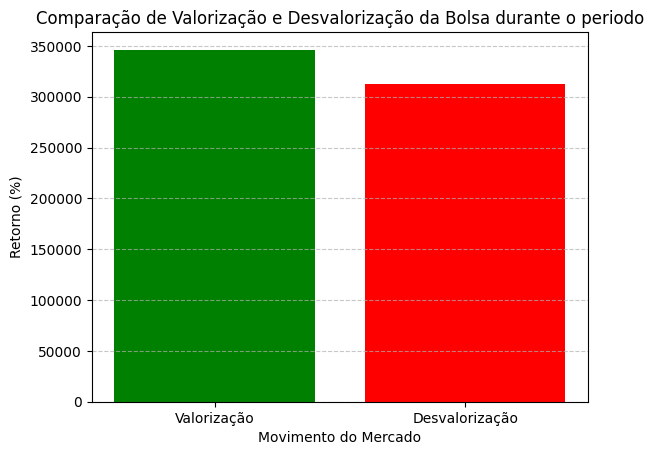

In [24]:
#plotando os dados
valores = [valorizacao, abs(desvalorizacao)]
rotulos = ["Valorização", "Desvalorização"]
plt.bar(rotulos, valores, color=["green", "red"])
plt.xlabel("Movimento do Mercado")
plt.ylabel("Retorno (%)")
plt.title("Comparação de Valorização e Desvalorização da Bolsa durante o periodo")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()


In [25]:
#Calculando a valorização e a desvalorização por ano
valorizacao_por_ano = df[df["return (%)"] > 0].groupby("year")["return (%)"].sum()
desvalorizacao_por_ano = abs(df[df["return (%)"] < 0].groupby("year")["return (%)"].sum())

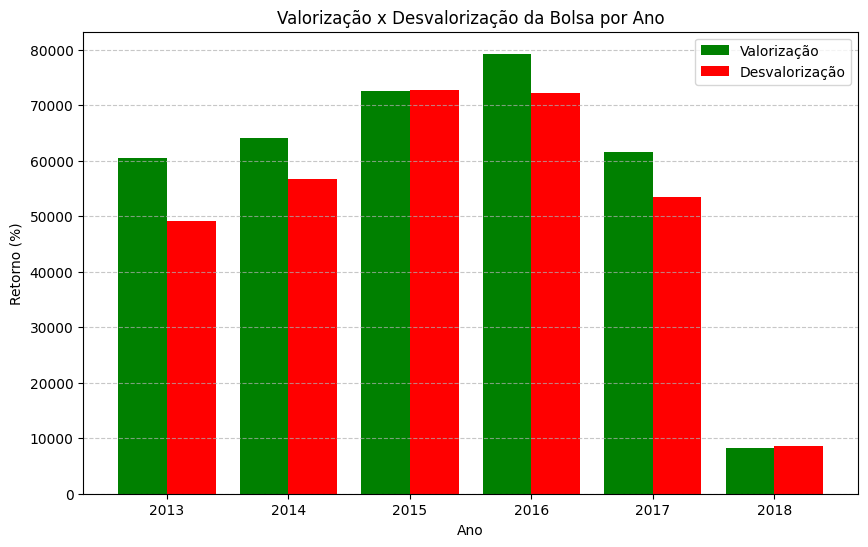

In [26]:

#Criando gráfico para comparar a valorização X desvalorização por ano
anos = valorizacao_por_ano.index

plt.figure(figsize=(10, 6))
plt.bar(anos - 0.4/2, valorizacao_por_ano, width=0.4, color='green', label='Valorização')
plt.bar(anos + 0.4/2, desvalorizacao_por_ano, width=0.4, color='red', label='Desvalorização')


plt.xlabel("Ano")
plt.ylabel("Retorno (%)")
plt.title("Valorização x Desvalorização da Bolsa por Ano")
plt.legend()
plt.grid(axis="y", linestyle="--", alpha=0.7)


plt.show()


In [27]:
#Calculando a valorização liquida do periodo
saldo_valorizacao = valorizacao_por_ano.sum() - desvalorizacao_por_ano.sum()
print(f"Valorização líquida do período: {saldo_valorizacao:.2f}%")

Valorização líquida do período: 33479.28%


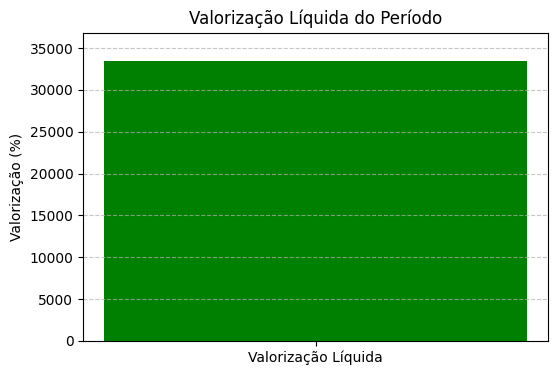

In [28]:
#Criando gráfico para visualizar a valorização liquida do periodo
saldo_valorizacao = valorizacao_por_ano.sum() - desvalorizacao_por_ano.sum()


plt.figure(figsize=(6, 4))
plt.bar(["Valorização Líquida"], [saldo_valorizacao], color="green")


plt.ylabel("Valorização (%)")
plt.title("Valorização Líquida do Período")
plt.ylim(0, saldo_valorizacao * 1.1)
plt.grid(axis="y", linestyle="--", alpha=0.7)


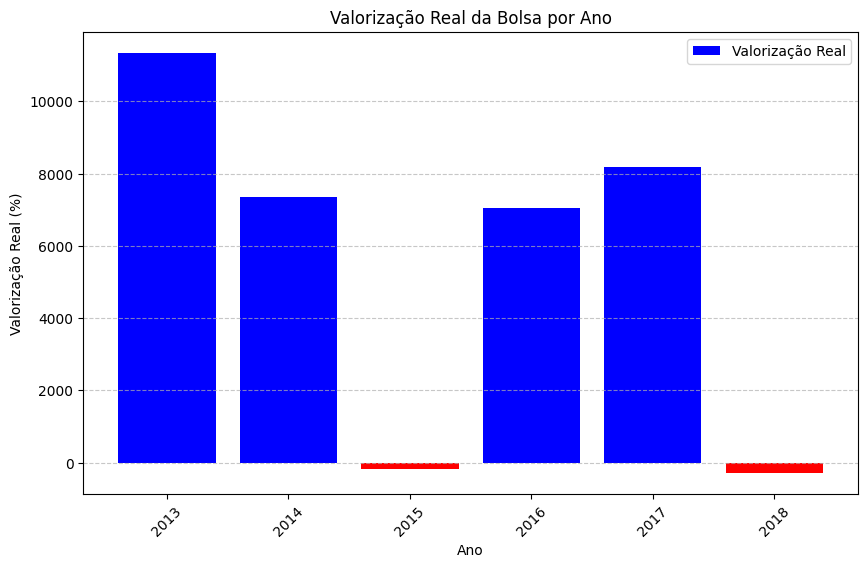

In [29]:
# Calculando a valorização real por ano
valorizacao_real_por_ano = valorizacao_por_ano - desvalorizacao_por_ano

# Definir cores: azul para valores positivos, vermelho para negativos
cores = ["blue" if v >= 0 else "red" for v in valorizacao_real_por_ano]

# Criando a figura e o gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(valorizacao_real_por_ano.index, valorizacao_real_por_ano, color=cores, label="Valorização Real")


# Adicionando rótulos
plt.xlabel("Ano")
plt.ylabel("Valorização Real (%)")
plt.title("Valorização Real da Bolsa por Ano")
plt.legend()
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Exibindo o gráfico
plt.xticks(rotation=45)
plt.show()

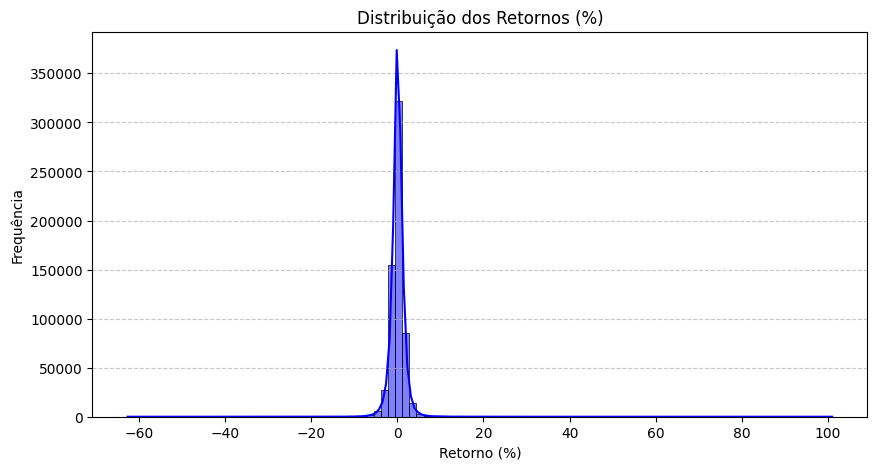

In [30]:
#Criando um gráfico histograma para análisar a distribuição dos retornos em porcentagem
plt.figure(figsize=(10, 5))

sns.histplot(df['return (%)'], bins=100, kde=True, color='blue')

plt.title('Distribuição dos Retornos (%)')
plt.xlabel('Retorno (%)')
plt.ylabel('Frequência')
plt.grid(axis="y", linestyle="--", alpha=0.7)



plt.show()

In [83]:
a, b = np.polyfit(df['volatility'], df['return (%)'], 1)
y = a * df['volatility'] + b
a, b

(np.float64(2.6283822065556524), np.float64(0.01774758606615659))

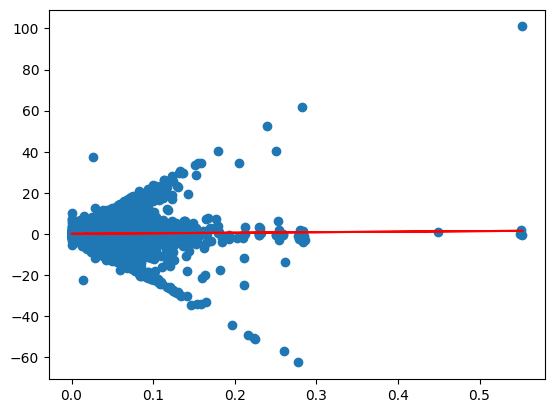

In [84]:
#Criando um gráfico de regressão linear para entender a relação entre retorno X volatilidade
plt.plot(df['volatility'], df['return (%)'], 'o', label='Dados')
plt.plot(df['volatility'], y, 'r', label='Regressão Linear')


In [85]:
#Verificando o ajuste da reta aos dados
np.linalg.norm(df['return (%)'] - y)

np.float64(1224.2803079419743)

In [86]:
from sklearn.metrics import r2_score
r2 = r2_score(df['return (%)'], y)
print(f'R²: {r2}')


R²: 0.0002689276297243026


Análise da Relação entre Volatilidade e Retorno

De acordo com o gráfico de regressão linear, observamos que os dados estão bastante dispersos e não seguem um padrão claro.  
Os principais indicadores confirmam essa falta de relação entre as variáveis:  

- O erro (Norma) foi alto (1224.28), indicando que a reta de regressão não se ajusta bem aos dados.  
- O coeficiente de determinação (R²) foi muito baixo (0.00026), mostrando que a volatilidade não explica a variação dos retornos.  
- A reta de regressão não apresenta inclinação significativa, reforçando a ausência de uma relação linear entre as variáveis.  

Conclusão:  
A volatilidade dos ativos **não tem impacto significativo sobre os retornos**, sugerindo que outros fatores podem ser mais relevantes na determinação dos retornos dos ativos analisados.  

##Tratando outliers

In [34]:
df.describe()

,open,high,low,close,volume,year,EMA10,return,return (%),volatility,target
count,618531.000000,618531.000000,618531.000000,618531.000000,6.185310e+05,618531.000000,618531.000000,618531.000000,618531.000000,618531.000000,618531.000000
mean,83.044157,83.799342,82.276643,83.063911,4.321230e+06,2015.126862,82.873733,0.000541,0.054127,0.013076,0.521314
std,97.403932,98.233099,96.532500,97.414028,8.690688e+06,1.445184,97.039487,0.016060,1.606043,0.009466,0.499546
min,1.620000,1.690000,1.500000,1.590000,0.000000e+00,2013.000000,1.736351,-0.626183,-62.618262,0.000227,0.000000
25%,40.230000,40.630000,39.842250,40.250000,1.070378e+06,2014.000000,40.226099,-0.006793,-0.679250,0.007369,0.000000
50%,62.610000,63.170000,62.030000,62.630000,2.082090e+06,2015.000000,62.557747,0.000635,0.063523,0.010884,1.000000
75%,94.390000,95.206000,93.560000,94.430000,4.284124e+06,2016.000000,94.152232,0.008105,0.810474,0.016059,1.000000
max,2044.000000,2067.990000,2035.110000,2049.000000,6.182376e+08,2018.000000,2026.843387,1.009513,100.951315,0.552558,1.000000


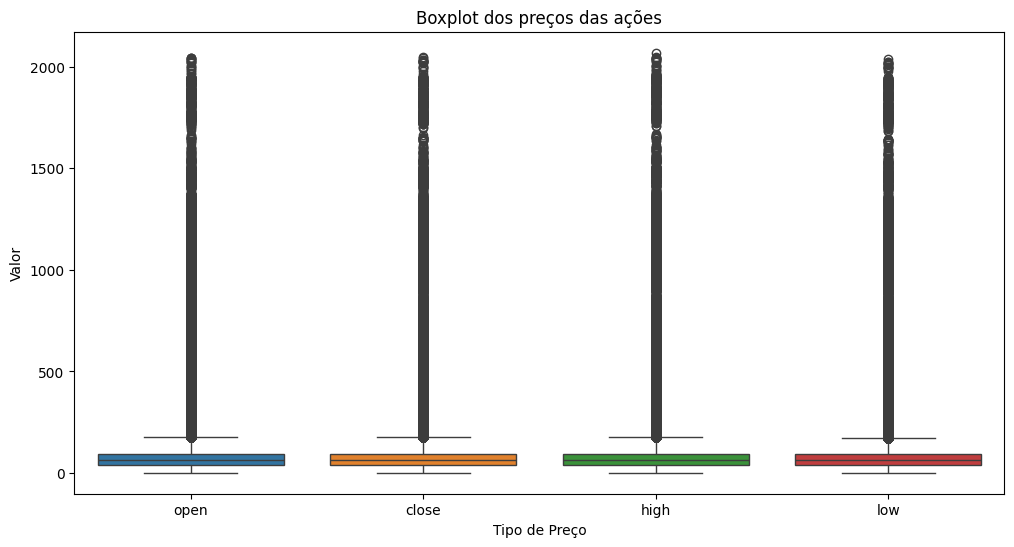

In [35]:
# Criar a figura
plt.figure(figsize=(12,6))

# Criar boxplot para todas as colunas de preço
sns.boxplot(data=df[['open', 'close', 'high', 'low']])

# Ajustando rótulos
plt.title('Boxplot dos preços das ações')
plt.xlabel('Tipo de Preço')
plt.ylabel('Valor')

plt.show()

In [36]:
#Calculando o intervalos interquantis
q1_open = df['open'].quantile(0.25)
q3_open = df['open'].quantile(0.75)
iqr_open = q3_open - q1_open

q1_close = df['close'].quantile(0.25)
q3_close = df['close'].quantile(0.75)
iqr_close = q3_close - q1_close

q1_high = df['high'].quantile(0.25)
q3_high = df['high'].quantile(0.75)
iqr_high = q3_high - q1_high

q1_low = df['low'].quantile(0.25)
q3_low = df['low'].quantile(0.75)
iqr_low = q3_low - q1_low


In [37]:
def winsorizing_outlier(dataset, column, q1, q3, iqr):
    if dataset[column] < q1 - 1.5 * iqr:
        return q1 - 1.5 * iqr
    elif dataset[column] > q3 + 1.5 * iqr:
        return q3 + 1.5 * iqr
    else:
        return dataset[column]


In [38]:
cols = ['open', 'close', 'high', 'low']
q1 = {col: df[col].quantile(0.25) for col in cols}
q3 = {col: df[col].quantile(0.75) for col in cols}
iqr = {col: q3[col] - q1[col] for col in cols}

for col in cols:
    df[col] = df.apply(lambda x: winsorizing_outlier(x, col, q1[col], q3[col], iqr[col]), axis=1)


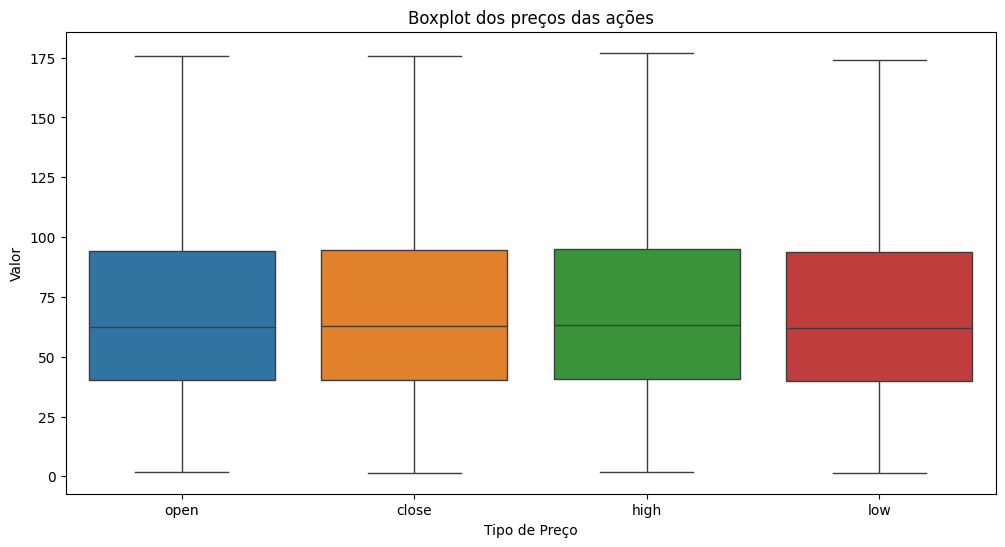

In [39]:
# Criar a figura
plt.figure(figsize=(12,6))

# Criar boxplot para todas as colunas de preço
sns.boxplot(data=df[['open', 'close', 'high', 'low']])

# Ajustando rótulos
plt.title('Boxplot dos preços das ações')
plt.xlabel('Tipo de Preço')
plt.ylabel('Valor')

plt.show()

###Recriando features, ja que alguns dados foram afetados ao tratar os outliers

In [42]:
#Criando coluna de média movel exponencial
df['EMA10'] = df.groupby('Name')['close'].transform(lambda x: x.ewm(span=10, adjust=False).mean())
df

,date,open,high,low,close,volume,Name,year,EMA10,return,return (%),volatility,target
1,2013-02-11,14.89,15.01,14.26,14.46,8882000,AAL,2013,14.460000,-0.019661,-1.966102,0.017841,0
2,2013-02-12,14.45,14.51,14.10,14.27,8126000,AAL,2013,14.425455,-0.013140,-1.313970,0.017841,0
3,2013-02-13,14.30,14.94,14.25,14.66,10259500,AAL,2013,14.468099,0.027330,2.733006,0.017841,1
4,2013-02-14,14.94,14.96,13.16,13.99,31879900,AAL,2013,14.381172,-0.045703,-4.570259,0.017841,0
5,2013-02-15,13.93,14.61,13.93,14.50,15628000,AAL,2013,14.402777,0.036455,3.645461,0.034207,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
619035,2018-02-01,76.84,78.27,76.69,77.82,2982259,ZTS,2018,77.722553,0.014206,1.420566,0.015148,1
619036,2018-02-02,77.53,78.12,76.73,76.78,2595187,ZTS,2018,77.551180,-0.013364,-1.336417,0.013224,0
619037,2018-02-05,76.64,76.92,73.18,73.83,2962031,ZTS,2018,76.874602,-0.038421,-3.842146,0.019033,0
619038,2018-02-06,72.74,74.56,72.13,73.27,4924323,ZTS,2018,76.219220,-0.007585,-0.758499,0.019201,0


In [43]:
#Criando coluna de retorno, o que diz que diz se a ação valorizou ou não de um dia para o outro, e a coluna de retorno em % para saber quanto foi essa valorização/desvalorização
df['return'] = df.groupby('Name')['close'].pct_change()
df['return (%)'] = df.groupby('Name')['close'].pct_change()*100
df

,date,open,high,low,close,volume,Name,year,EMA10,return,return (%),volatility,target
1,2013-02-11,14.89,15.01,14.26,14.46,8882000,AAL,2013,14.460000,NaN,NaN,0.017841,0
2,2013-02-12,14.45,14.51,14.10,14.27,8126000,AAL,2013,14.425455,-0.013140,-1.313970,0.017841,0
3,2013-02-13,14.30,14.94,14.25,14.66,10259500,AAL,2013,14.468099,0.027330,2.733006,0.017841,1
4,2013-02-14,14.94,14.96,13.16,13.99,31879900,AAL,2013,14.381172,-0.045703,-4.570259,0.017841,0
5,2013-02-15,13.93,14.61,13.93,14.50,15628000,AAL,2013,14.402777,0.036455,3.645461,0.034207,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
619035,2018-02-01,76.84,78.27,76.69,77.82,2982259,ZTS,2018,77.722553,0.014206,1.420566,0.015148,1
619036,2018-02-02,77.53,78.12,76.73,76.78,2595187,ZTS,2018,77.551180,-0.013364,-1.336417,0.013224,0
619037,2018-02-05,76.64,76.92,73.18,73.83,2962031,ZTS,2018,76.874602,-0.038421,-3.842146,0.019033,0
619038,2018-02-06,72.74,74.56,72.13,73.27,4924323,ZTS,2018,76.219220,-0.007585,-0.758499,0.019201,0


In [44]:
df.isnull().sum()

,0
date,0
open,0
high,0
low,0
close,0
volume,0
Name,0
year,0
EMA10,0
return,505


In [45]:
#Ao ser calculado os valores de retornos, criamos nans para o primeiro dia, pois não tinha como pegar o preço anterior ao primeiro dia
#Estou tratando esses dados faltantes, excluindo a linha pois nao seria util nesse caso
df.dropna(inplace=True)
df

,date,open,high,low,close,volume,Name,year,EMA10,return,return (%),volatility,target
2,2013-02-12,14.45,14.51,14.10,14.27,8126000,AAL,2013,14.425455,-0.013140,-1.313970,0.017841,0
3,2013-02-13,14.30,14.94,14.25,14.66,10259500,AAL,2013,14.468099,0.027330,2.733006,0.017841,1
4,2013-02-14,14.94,14.96,13.16,13.99,31879900,AAL,2013,14.381172,-0.045703,-4.570259,0.017841,0
5,2013-02-15,13.93,14.61,13.93,14.50,15628000,AAL,2013,14.402777,0.036455,3.645461,0.034207,1
6,2013-02-19,14.33,14.56,14.08,14.26,11354400,AAL,2013,14.376818,-0.016552,-1.655172,0.033854,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
619035,2018-02-01,76.84,78.27,76.69,77.82,2982259,ZTS,2018,77.722553,0.014206,1.420566,0.015148,1
619036,2018-02-02,77.53,78.12,76.73,76.78,2595187,ZTS,2018,77.551180,-0.013364,-1.336417,0.013224,0
619037,2018-02-05,76.64,76.92,73.18,73.83,2962031,ZTS,2018,76.874602,-0.038421,-3.842146,0.019033,0
619038,2018-02-06,72.74,74.56,72.13,73.27,4924323,ZTS,2018,76.219220,-0.007585,-0.758499,0.019201,0


In [46]:
#Criando coluna de volatilidade, para sabermos a volatilidade dos ativos nos ultimos 5 dias
#Como nao temos dados para calcular os dados iniciais, acaba sendo criado dados faltantes, vou trata-los usando o metodo fill que usa o primeiro valor válido da volatilidade e copia para os NaNs anteriores, mantendo a coerencia temporal
df['volatility'] = df.groupby('Name')['return'].rolling(window=5).std().reset_index(level=0, drop=True).fillna(method='ffill')
df.head(10)

<ipython-input-46-5478e1d7ab06>:3: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['volatility'] = df.groupby('Name')['return'].rolling(window=5).std().reset_index(level=0, drop=True).fillna(method='ffill')


,date,open,high,low,close,volume,Name,year,EMA10,return,return (%),volatility,target
2,2013-02-12,14.45,14.51,14.10,14.27,8126000,AAL,2013,14.425455,-0.013140,-1.313970,0.017841,0
3,2013-02-13,14.30,14.94,14.25,14.66,10259500,AAL,2013,14.468099,0.027330,2.733006,0.017841,1
4,2013-02-14,14.94,14.96,13.16,13.99,31879900,AAL,2013,14.381172,-0.045703,-4.570259,0.017841,0
5,2013-02-15,13.93,14.61,13.93,14.50,15628000,AAL,2013,14.402777,0.036455,3.645461,0.017841,1
6,2013-02-19,14.33,14.56,14.08,14.26,11354400,AAL,2013,14.376818,-0.016552,-1.655172,0.033854,0
7,2013-02-20,14.17,14.26,13.15,13.33,14725200,AAL,2013,14.186487,-0.065217,-6.521739,0.044387,0
8,2013-02-21,13.62,13.95,12.90,13.37,11922100,AAL,2013,14.038035,0.003001,0.300075,0.040014,1
9,2013-02-22,13.57,13.60,13.21,13.57,6071400,AAL,2013,13.952938,0.014959,1.495886,0.038533,1
10,2013-02-25,13.60,13.76,13.00,13.02,7186400,AAL,2013,13.783313,-0.040531,-4.053058,0.032502,0
11,2013-02-26,13.14,13.42,12.70,13.26,9419000,AAL,2013,13.688165,0.018433,1.843318,0.037103,1


In [47]:
#Checando se sobraram dados faltantes
df.isna().sum()

,0
date,0
open,0
high,0
low,0
close,0
volume,0
Name,0
year,0
EMA10,0
return,0


In [48]:
#Como foram poucos dados faltantes, irei excluir as linhas
df.dropna(inplace=True)
df.isna().sum()

,0
date,0
open,0
high,0
low,0
close,0
volume,0
Name,0
year,0
EMA10,0
return,0


In [49]:
df

,date,open,high,low,close,volume,Name,year,EMA10,return,return (%),volatility,target
2,2013-02-12,14.45,14.51,14.10,14.27,8126000,AAL,2013,14.425455,-0.013140,-1.313970,0.017841,0
3,2013-02-13,14.30,14.94,14.25,14.66,10259500,AAL,2013,14.468099,0.027330,2.733006,0.017841,1
4,2013-02-14,14.94,14.96,13.16,13.99,31879900,AAL,2013,14.381172,-0.045703,-4.570259,0.017841,0
5,2013-02-15,13.93,14.61,13.93,14.50,15628000,AAL,2013,14.402777,0.036455,3.645461,0.017841,1
6,2013-02-19,14.33,14.56,14.08,14.26,11354400,AAL,2013,14.376818,-0.016552,-1.655172,0.033854,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
619035,2018-02-01,76.84,78.27,76.69,77.82,2982259,ZTS,2018,77.722553,0.014206,1.420566,0.015148,1
619036,2018-02-02,77.53,78.12,76.73,76.78,2595187,ZTS,2018,77.551180,-0.013364,-1.336417,0.013224,0
619037,2018-02-05,76.64,76.92,73.18,73.83,2962031,ZTS,2018,76.874602,-0.038421,-3.842146,0.019033,0
619038,2018-02-06,72.74,74.56,72.13,73.27,4924323,ZTS,2018,76.219220,-0.007585,-0.758499,0.019201,0


In [50]:
# Criando função para gerar a coluna 'target', que será utilizada como variável alvo no modelo de classificação
# A variável target será 1 se o retorno percentual for positivo (ação subiu) e 0 se o retorno percentual for 0 ou negativo (ação caiu ou ficou igual)
def target_variable(dataset):
  if dataset['return (%)'] > 0:
    return 1
  else:
    return 0

In [51]:
#Aplicando função no dataset, crinado a coluna 'target'
df['target'] = df.apply(target_variable, axis=1)
#Pronto, o dataset agora esta rico para treinar nosso modelo
df

,date,open,high,low,close,volume,Name,year,EMA10,return,return (%),volatility,target
2,2013-02-12,14.45,14.51,14.10,14.27,8126000,AAL,2013,14.425455,-0.013140,-1.313970,0.017841,0
3,2013-02-13,14.30,14.94,14.25,14.66,10259500,AAL,2013,14.468099,0.027330,2.733006,0.017841,1
4,2013-02-14,14.94,14.96,13.16,13.99,31879900,AAL,2013,14.381172,-0.045703,-4.570259,0.017841,0
5,2013-02-15,13.93,14.61,13.93,14.50,15628000,AAL,2013,14.402777,0.036455,3.645461,0.017841,1
6,2013-02-19,14.33,14.56,14.08,14.26,11354400,AAL,2013,14.376818,-0.016552,-1.655172,0.033854,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
619035,2018-02-01,76.84,78.27,76.69,77.82,2982259,ZTS,2018,77.722553,0.014206,1.420566,0.015148,1
619036,2018-02-02,77.53,78.12,76.73,76.78,2595187,ZTS,2018,77.551180,-0.013364,-1.336417,0.013224,0
619037,2018-02-05,76.64,76.92,73.18,73.83,2962031,ZTS,2018,76.874602,-0.038421,-3.842146,0.019033,0
619038,2018-02-06,72.74,74.56,72.13,73.27,4924323,ZTS,2018,76.219220,-0.007585,-0.758499,0.019201,0


##ANOTAÇÕES: